***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df_ibge = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
display(df_ibge.head())

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [6]:
# vou descobrir o maior e o menor valor, para colocar na lista
menor_valor = df_ibge.Renda.min()
maior_valor = df_ibge.Renda.max()

# pensando que no futuro o SM poderia mudar, vou colocá-lo em um variável para caso queria mudar fique mais fácil
salario_minimo = 788.00

intervalos = [menor_valor, 2 * salario_minimo, 5 * salario_minimo, 15 * salario_minimo, 25 * salario_minimo, 
              maior_valor]
print(intervalos)

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]


### 2º Definir os labels das classes

In [7]:
# como nos intervalor comecei da menor renda até a maior vou criar as labels assim também
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [43]:
freq_salario = df_ibge.value_counts(
        pd.cut(x = df_ibge.Renda,
               bins = intervalos,
               labels = labels,
              include_lowest = True)
)

display(freq_salario)

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [17]:
perc_salario = df_ibge.value_counts(
        pd.cut(x = df_ibge.Renda,
               bins = intervalos,
               labels = labels,
              include_lowest = True
              ),
    normalize = True
) * 100

display(perc_salario)

Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [174]:
df_freq_perc_salario = pd.DataFrame({'Frequência': freq_salario, 'Porcentagem %': perc_salario})
df_freq_perc_salario.sort_index(ascending = False, inplace = True)
display(df_freq_perc_salario)

,Frequência,Porcentagem %
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

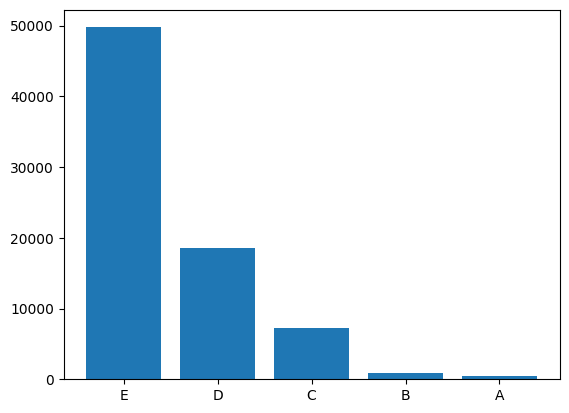

In [22]:
plt.bar(x = labels, height=freq_salario)
plt.show()

### Analise a classe em relação a cor de pele

In [41]:
classe = pd.cut(x = df_ibge.Renda,
               bins = intervalos,
               labels = labels,
              include_lowest = True
              )

df_ibge.loc[:, 'Classe'] = classe

display(df_ibge)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


In [55]:
cor_classe = pd.crosstab(
        index = df_ibge.Classe,
        columns = df_ibge.Cor
)
cor_classe.rename(cor, axis=1, inplace = True)

display(cor_classe)

Cor,Indígena,Branca,Preta,Amarela,Parda
Classe,,,,,
E,287,16676,6266,128,26398
D,52,9562,1680,107,7201
C,16,4638,407,90,2090
B,1,610,27,18,166
A,1,329,11,9,70


In [57]:
anos_estudo_classe = pd.crosstab(
        index = df_ibge['Anos de Estudo'],
        columns = df_ibge.Cor
)
anos_estudo_classe.rename(anos_de_estudo, axis=0, inplace = True)
anos_estudo_classe.rename(cor, axis=1, inplace = True)

display(anos_estudo_classe)

Cor,Indígena,Branca,Preta,Amarela,Parda
Anos de Estudo,,,,,
Sem instrução e menos de 1 ano,49,1420,801,9,3570
1 ano,10,364,174,2,838
2 anos,12,617,261,1,1210
3 anos,17,929,361,3,1581
4 anos,22,2683,694,21,3309
5 anos,23,1600,523,7,2346
6 anos,12,860,295,6,1272
7 anos,16,940,315,1,1417
8 anos,45,3102,900,26,3907


> ### Conclusões

1- Percebemos uma enorme desigualdade social, onde mais de 60% das pessoas ganham até 2 salários mínimos.

2- Percebemos que temos muito dinheiro nas mãos de poucas pessoas, isso fica evidente notando que a classe B e A juntas não passam de 1300 pessoas, isso representa 1.5% da população (chefe de família) em 2015.

3- Agora se analisarmos as classes E e D temos mais ou menos 68300 pessoas, cerca de 89% da população.

4- Percebemos uma predominância das pessoas brancas quando a classe vai aumentando, notamos que os negros, amarelos e indígenas sempre estão em menor número, mostrando assim que possivelmente além de uma desigualdade de classe também temos uma desigualdade racial no país.

5- Sabemos que técnicamente quando a pessoa estuda mais ela tende a ter um salário maior, notamos que as pessoas brancas são as que mais tem anos de estudo (e também são as pessoas mais predominantes em classes mais altas), levando em conta o contexto conhecido do Brasil sabemos que os brancos tem mais oportunidades de estudo (muitas vezes por privilégio) e as outras raças não tem tanta oportunidade, muitas vezes por falta de renda, racismo ou tiveram que largar os estudos para começar a ajudar na renda da casa.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: xlabel='Idade', ylabel='Count'>

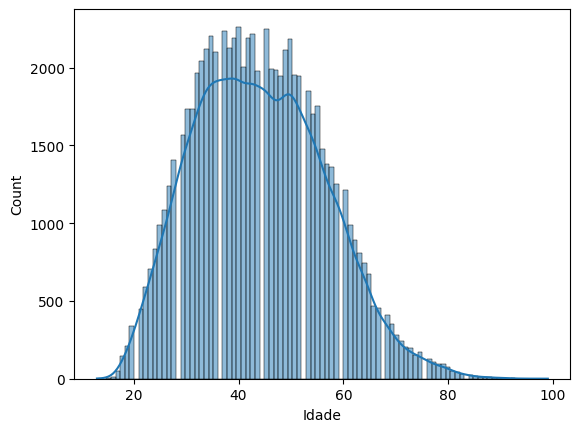

In [60]:
# idade, renda, altura
sns.histplot(df_ibge.Idade, kde = True)

<Axes: xlabel='Altura', ylabel='Count'>

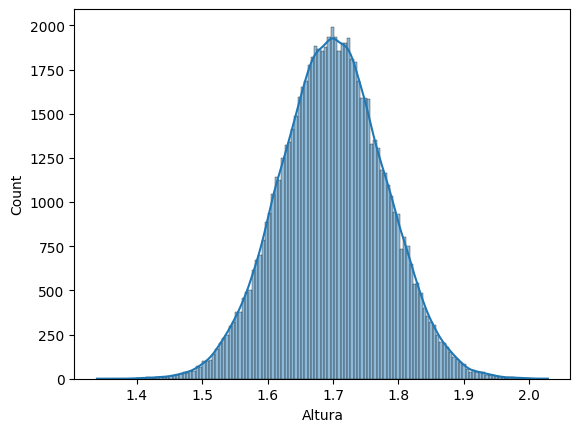

In [79]:
sns.histplot(df_ibge.Altura, kde = True)

<Axes: xlabel='Renda', ylabel='Count'>

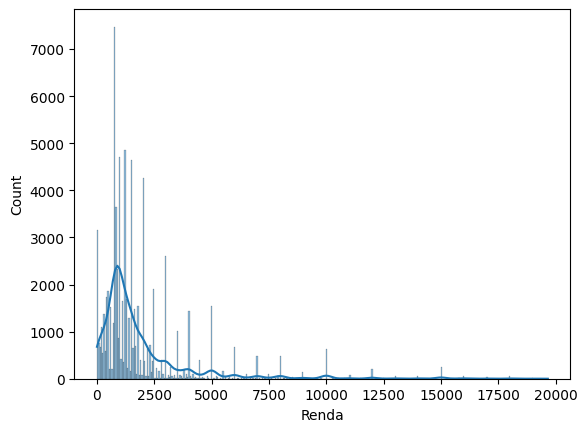

In [86]:
sns.histplot(df_ibge.query('Renda < 20000').Renda, kde = True)

> ### Conclusões

1- Notamos que a altura é muito simétrica, visto que ela foi criada para ser desse jeito, já que ela não existia originalmente.

2- Percebemos que há uma concentração de pessoas na faixa de 40 anos.

3- Percemos novamente que a renda se concentra muito a esquerda do gráfico, provando assim que existe uma desigualdade salárial no país, onde a renda mínima ou perto da mínima é onde tem mais frequência. 

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [47]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'from scipy import stats


}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [95]:
df_cor_sexo = pd.crosstab(
    index = df_ibge.Sexo,
    columns = df_ibge.Cor
)

df_cor_sexo.rename(sexo, axis = 0, inplace = True)
df_cor_sexo.rename(cor, axis = 1, inplace = True)

df_cor_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [99]:
df_cor_sexo_perc = pd.crosstab(
    index = df_ibge.Sexo,
    columns = df_ibge.Cor,
    normalize = True
) * 100

df_cor_sexo_perc.rename(sexo, axis = 0, inplace = True)
df_cor_sexo_perc.rename(cor, axis = 1, inplace = True)

df_cor_sexo_perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

1- Percebemos que indígenas e amarelos não a minoria na sociedade, visto que eles não chegam a 1% das pessoas que responderam a pesquisa (lembrando que só reponderam chefes de família).

2- Percebemos uma alta miscigenação do povo brasileiro, visto que os pardos são a maioria da sociedade tanto em homens quanto em mulheres.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [100]:
df_ibge.Renda.mean()

np.float64(2000.3831988547631)

### Obtenha a mediana

In [102]:
df_ibge.Renda.median()

1200.0

### Obtenha a moda

In [176]:
df_ibge.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [112]:
def mad(df, coluna):
    df_coluna = df[[coluna]].copy()
    media_coluna = df_coluna.mean().iloc[0]
    df_coluna.loc[:, '|Desvio|'] = abs(df_coluna[coluna] - media_coluna)
    mad = df_coluna['|Desvio|'].mean()
    return df_coluna, mad

In [113]:
df_desvio_renda, mad = mad(df_ibge, 'Renda')
display(df_desvio_renda)
print(mad)

,Renda,|Desvio|
0,800,1200.383199
1,1150,850.383199
2,880,1120.383199
3,3500,1499.616801
4,150,1850.383199
...,...,...
76835,812,1188.383199
76836,1500,500.383199
76837,1300,700.383199
76838,1500,500.383199


1526.4951371638058


### Obtenha a variância

In [105]:
df_ibge.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [106]:
df_ibge.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [121]:
df_renda_sexo_cor = pd.crosstab(
    index = df_ibge.Sexo,
    columns = df_ibge.Cor,
    aggfunc = {'mean', 'median', 'max'},
    values = df_ibge.Renda
)

df_renda_sexo_cor.rename(sexo, axis = 0, inplace = True)
df_renda_sexo_cor.rename(cor, axis = 1, inplace = True)

display(df_renda_sexo_cor)

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [122]:
df_renda_sexo_cor = pd.crosstab(
    index = df_ibge.Sexo,
    columns = df_ibge.Cor,
    aggfunc = {'std'},
    values = df_ibge.Renda
)

df_renda_sexo_cor.rename(sexo, axis = 0, inplace = True)
df_renda_sexo_cor.rename(cor, axis = 1, inplace = True)

display(df_renda_sexo_cor)

std                                                   
Cor            Indígena       Branca        Preta     Amarela        Parda
Sexo                                                                      
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048

> ### Conclusões

1- Percebemos que homens e mulheres brancos tem um salário maior que as outras raças

2- Percebemos que os brancos e amarelos (homens e mulheres) tem uma dispersão nos dados muito grande, ou seja, temos pessoas com salários muito alto e muito baixo, evidenciando mais uma vez a desigualdade.

3- Os homens indígenas e as mulheres pardas tem seus salários bem menos dispersos.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/tmp/ipykernel_63763/1377152883.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

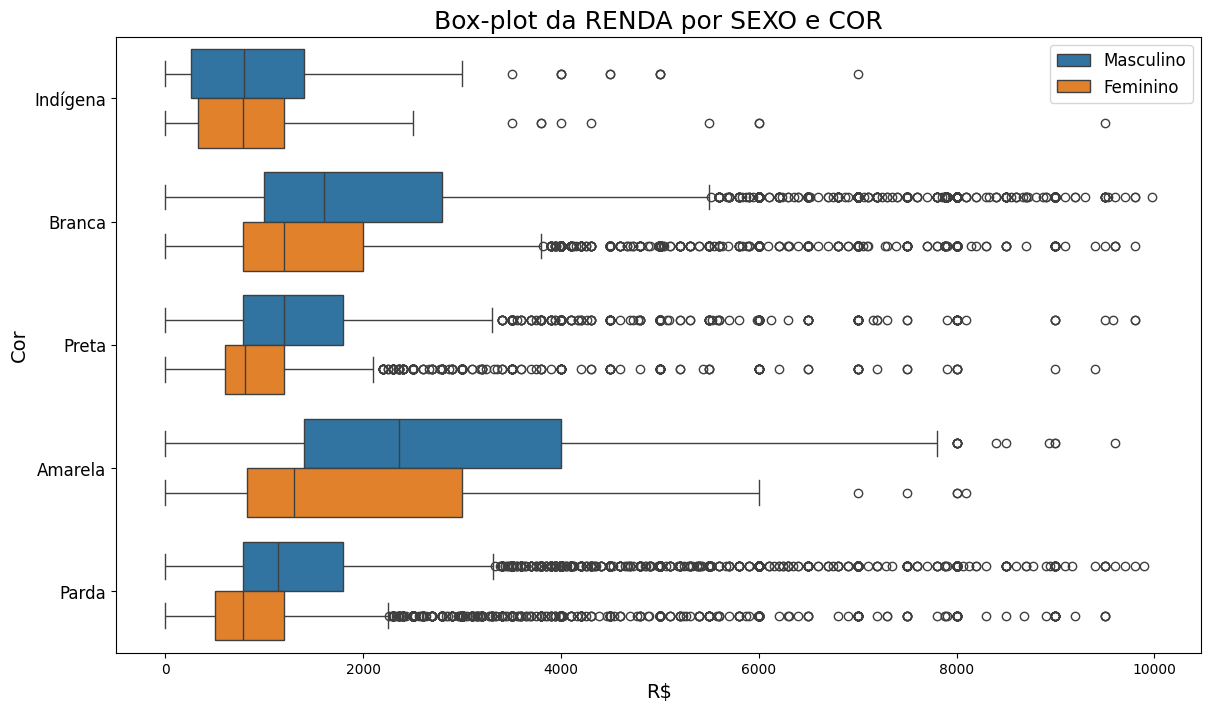

In [181]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=df_ibge.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [143]:
stats.percentileofscore(a = df_ibge.Renda, score = 788, kind = 'weak')

np.float64(28.867777199375325)

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [151]:
df_ibge.Renda.quantile([x / 100 for x in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [159]:
df_estudo_sexo = pd.crosstab(
    index = df_ibge['Anos de Estudo'],
    columns = df_ibge.Sexo,
    aggfunc = {'mean'},
    values = df_ibge.Renda
)

df_estudo_sexo.rename(sexo, axis = 1, inplace = True)
df_estudo_sexo.rename(anos_de_estudo, axis = 0, inplace = True)
    
df_estudo_sexo

mean             
Sexo                              Masculino     Feminino
Anos de Estudo                                          
Sem instrução e menos de 1 ano   799.494638   516.201748
1 ano                            895.629047   492.771987
2 anos                           931.178986   529.911638
3 anos                          1109.203862   546.853916
4 anos                          1302.329283   704.279111
5 anos                          1338.653218   781.389776
6 anos                          1448.875419   833.732824
7 anos                          1465.497940   830.751004
8 anos                          1639.396667   933.615351
9 anos                          1508.038850   868.021700
10 anos                         1731.270847   925.919225
11 anos                         2117.060504  1286.790889
12 anos                         2470.330776  1682.313725
13 anos                         3195.099154  1911.730047
14 anos                         3706.620269  2226.460457
15 anos ou mais                 6134.279790  3899.513231
Não determinados                1295.761905   798.174419

In [160]:
df_estudo_sexo = pd.crosstab(
    index = df_ibge['Anos de Estudo'],
    columns = df_ibge.Sexo,
    aggfunc = {'median'},
    values = df_ibge.Renda
)

df_estudo_sexo.rename(sexo, axis = 1, inplace = True)
df_estudo_sexo.rename(anos_de_estudo, axis = 0, inplace = True)

df_estudo_sexo

median         
Sexo                           Masculino Feminino
Anos de Estudo                                   
Sem instrução e menos de 1 ano     700.0    390.0
1 ano                              788.0    400.0
2 anos                             788.0    450.0
3 anos                             800.0    500.0
4 anos                            1000.0    788.0
5 anos                            1045.0    788.0
6 anos                            1200.0    788.0
7 anos                            1200.0    788.0
8 anos                            1300.0    800.0
9 anos                            1200.0    788.0
10 anos                           1218.0    800.0
11 anos                           1500.0   1000.0
12 anos                           1800.0   1200.0
13 anos                           2400.0   1300.0
14 anos                           2500.0   1600.0
15 anos ou mais                   4000.0   2800.0
Não determinados                  1200.0    788.0

In [161]:
df_estudo_sexo = pd.crosstab(
    index = df_ibge['Anos de Estudo'],
    columns = df_ibge.Sexo,
    aggfunc = {'max'},
    values = df_ibge.Renda
)

df_estudo_sexo.rename(sexo, axis = 1, inplace = True)
df_estudo_sexo.rename(anos_de_estudo, axis = 0, inplace = True)

df_estudo_sexo

max         
Sexo                           Masculino Feminino
Anos de Estudo                                   
Sem instrução e menos de 1 ano     30000    10000
1 ano                              30000     2000
2 anos                             40000     4000
3 anos                             80000     3500
4 anos                             50000    10000
5 anos                             35000     8000
6 anos                             25000     6000
7 anos                             40000     9000
8 anos                             30000    18000
9 anos                             60000    20000
10 anos                            45000     6000
11 anos                           200000   100000
12 anos                            30000   120000
13 anos                            25000    20000
14 anos                            50000    20000
15 anos ou mais                   200000   100000
Não determinados                    7000     3000

In [162]:
df_estudo_sexo = pd.crosstab(
    index = df_ibge['Anos de Estudo'],
    columns = df_ibge.Sexo,
    aggfunc = {'std'},
    values = df_ibge.Renda
)

df_estudo_sexo.rename(sexo, axis = 1, inplace = True)
df_estudo_sexo.rename(anos_de_estudo, axis = 0, inplace = True)

df_estudo_sexo

std             
Sexo                              Masculino     Feminino
Anos de Estudo                                          
Sem instrução e menos de 1 ano  1023.904884   639.311534
1 ano                           1331.950552   425.291842
2 anos                          1435.173827   498.234168
3 anos                          2143.800133   424.124446
4 anos                          1419.821787   629.553397
5 anos                          1484.650587   635.782641
6 anos                          1476.628602   574.547028
7 anos                          1419.708673   602.038029
8 anos                          1515.583715   896.781213
9 anos                          2137.664774   973.221652
10 anos                         2078.609734   620.611907
11 anos                         2676.538942  1819.040417
12 anos                         2268.081538  4851.833513
13 anos                         2797.116800  2053.789771
14 anos                         3987.214974  2064.083336
15 anos ou mais                 7447.613594  4212.770709
Não determinados                 979.648745   459.985964

> ### Conclusões

1- percebemos que quase 30% das pessoas que responderam a pesquisa ganham até 1 salário mínimo (R$788.00).

2- a renda máxima das pessoas até 99% dos nossos dados é de R$15000.

3- a média salarial, mediana salarial e o salário máximo dos homens é sempre maior do que a das mulheres, mesmo que ambos tenham estudados a mesma quantidade de tempo.

4- um homem com menos anos de estudo que uma mulher ou ganha mais que ela ou algo muito próximo a uma mulher com mais anos de estudo, por exemplo um homem com 3 anos de estudo tem uma média salarial de 1109, já uma mulher com 11 anos de estudo ganha em média 1286, a diferença nos anos de estudo é gritante, mas o salário não.

5- a dispersão na renda das mulheres é bem menor em relação a dos homens.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [169]:
df_renda_uf = df_ibge.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

df_renda_uf.rename(uf, axis = 0, inplace = True)
df_renda_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

In [172]:
df_renda_uf = df_ibge.groupby(['UF']).agg({'Anos de Estudo': ['mean', 'median', 'std']})

df_renda_uf.rename(uf, axis = 0, inplace = True)
df_renda_uf

Anos de Estudo                 
                              mean median       std
UF                                                 
Rondônia                  8.811971    9.0  4.522992
Acre                      8.398079    9.0  5.104309
Amazonas                  9.361741   11.0  4.517506
Roraima                   9.916667   12.0  4.724163
Pará                      8.672286    9.0  4.423871
Amapá                    10.050781   12.0  4.340831
Tocantins                 9.027565    9.0  4.714452
Maranhão                  7.518747    8.0  4.799690
Piauí                     7.014038    6.0  4.852771
Ceará                     8.665079    9.0  4.639160
Rio Grande do Norte       8.823227    9.0  4.720544
Paraíba                   8.165620    9.0  5.106413
Pernambuco                9.214921   10.0  4.653215
Alagoas                   7.838317    8.0  4.805807
Sergipe                   7.337995    7.0  4.728555
Bahia                     8.725730    9.0  4.659166
Minas Gerais              9.129846    9.0  4.446171
Espírito Santo            9.466578   10.0  4.441083
Rio de Janeiro           10.547516   12.0  4.110588
São Paulo                10.639045   12.0  4.134274
Paraná                   10.084252   12.0  4.383092
Santa Catarina           10.226813   12.0  4.123477
Rio Grande do Sul        10.104556   11.0  4.203717
Mato Grosso do Sul        9.509028   10.0  4.501400
Mato Grosso               9.472778   10.0  4.445624
Goiás                     9.435883   10.0  4.290675
Distrito Federal         11.910419   12.0  4.148458

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

/tmp/ipykernel_63763/4224528147.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)      # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por UF'}, xlabel='R$', ylabel='Estados'>

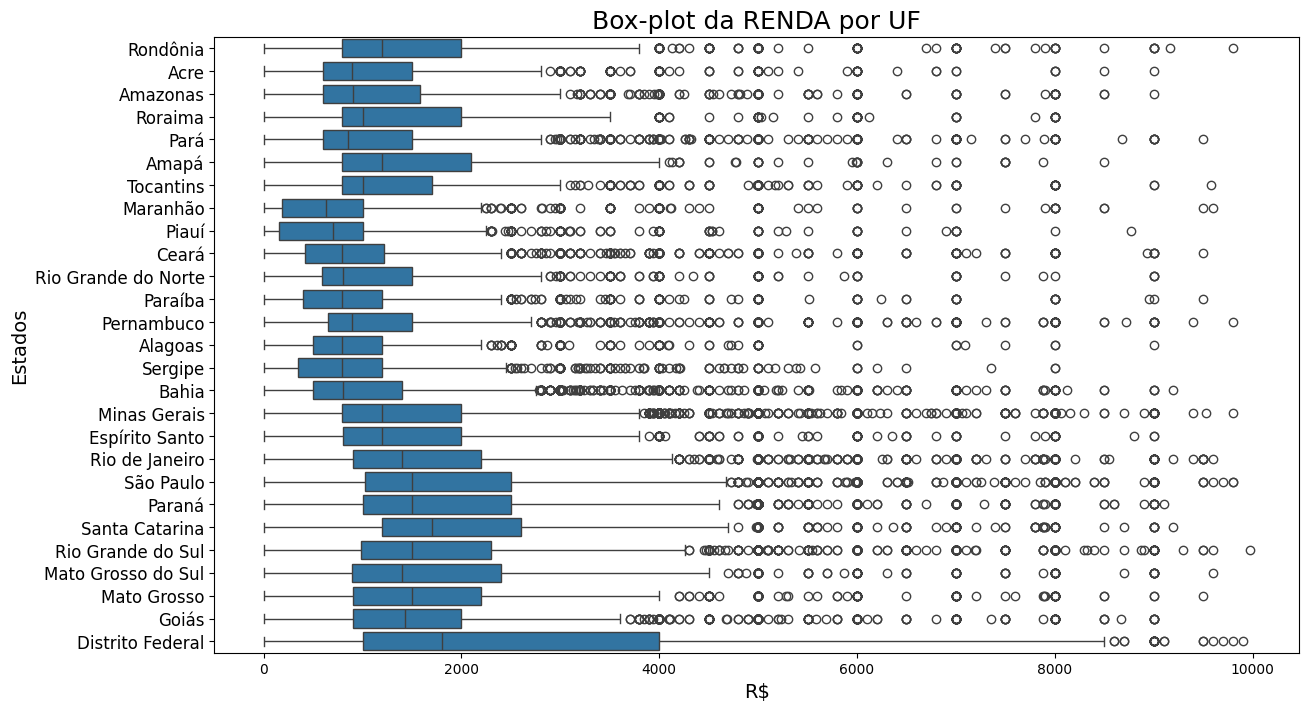

In [185]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=df_ibge.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por UF', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)      # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

1- Estados do Sul e Sudeste tem os maiores salários, perdendo apenas para o Distrito Federal.

2- Já o Norte e o Nordeste tem os menores salários. 

3- O Distrito Federal tem o maior salário e o maior tempo de estudo, lembrando que no Distrito Federal é onde se encontra a maioria dos políticos.

4- O Sul e Sudeste estudam por mais tempo que o Norte e o Nordeste, mas é importante lembrar que o acesso a educação no Norte é muito mais difícil do que no Sul e Sudeste, e o investimento no Sul e Sudeste é muito maior do que no Nordeste e Norte.